**Opti & Contrôle - TP1**

DESFORGES Guillaume & DUMONT Louis

In [1]:
import numpy as np

In [2]:
import matplotlib

In [3]:
matplotlib.rcParams['figure.figsize'] = (15, 10)

In [4]:
from src import datas_r

# Problème primal

On s'intéresse au problème primal d'optimisation **sans contraintes**.

## Résultats théoriques

*TODO*
- Montrer que les problèmes (13), (14) et (19) sont équivalents.
- Montrer que les problèmes (14) et (19) admettent chacun une solution unique, et que les critères de ces 2 problèmes sont strictement (mais pas fortement) convexes.

On calcule les formules du gradient et de la hessienne.

Pour le gradient on a l'expression suivante :

$\nabla_{q_c}(J) = B^T (r \bullet q \bullet |q| + A_r^T p_r)$

Et pour la Hessienne:

$H_{q_c}(J) = 2B^T (r \bullet |q| \bullet B^T)^T $

Où l'on a étendu la définition de $\bullet$ par : $v\bullet A$ est le produit matriciel de la matrice diagonale $diag(v_0 ,..., v_n)$ et de $X$.

## Oracle

On implémente un **oracle**, c'est à dire une fonction qui puise dans les données du problème pour donner à l'algorithme d'optimisation les informations qui lui sont nécessaire : valeur du critère, vecteur gradient du critère et si demandé matrice Hessienne du critère.

In [5]:
from src.oracle import oracle

In [6]:
x0 = np.random.normal(size=datas_r.n-datas_r.md)

In [7]:
print("Test de l'oracle")
# test pour une valeur aléatoire
loss, gradient, hessian = oracle(x0, compute_hessian=True)
print("Critère :", loss)
print("Gradient :", gradient)
print("Hessienne :", hessian)

Test de l'oracle
Critère : 5344.622226075899
Gradient : [    7.69351673   815.55208736  2676.83115017  1339.30714357
   398.74394416 -6377.71854208 -6637.79817919    14.61513398
 -4874.7578826 ]
Hessienne : [[   25.37738433     0.             0.             0.
    -16.27581157     0.             0.             0.
      0.        ]
 [    0.           893.05885625   799.27149838   348.24897532
    872.4756604   -872.4756604   -872.4756604     73.20416203
   -872.4756604 ]
 [    0.           799.27149838  2292.65183996  1002.97807751
    857.27959176 -1921.49515711  -857.27959176     0.
   -857.27959176]
 [    0.           348.24897532  1002.97807751  1160.20452977
    406.2570687  -1002.97807751  -406.2570687      0.
   -406.2570687 ]
 [  -16.27581157   872.4756604    857.27959176   406.2570687
   3606.37816947  -930.48375378 -1455.25459381    73.20416203
   -930.48375378]
 [    0.          -872.4756604  -1921.49515711 -1002.97807751
   -930.48375378  7283.64620778  4664.88562229   -73.2

## Descentes de gradient à pas fixe ou à pas optimal

Dans un premier temps, on implémente la descente de gradient à pas fixe :

In [8]:
from src.gradient import gradient

### Test

On teste la descente de gradient à pas fixe sur un problème trivial : $x^2$.

Descente de gradient à pas fixe :
Iter : 0 ; gradient_step=0.1 ; gradient_norm=4.0
Iter : 1 ; gradient_step=0.1 ; gradient_norm=3.2
Iter : 2 ; gradient_step=0.1 ; gradient_norm=2.56
Iter : 3 ; gradient_step=0.1 ; gradient_norm=2.048
Iter : 4 ; gradient_step=0.1 ; gradient_norm=1.6384
Iter : 5 ; gradient_step=0.1 ; gradient_norm=1.31072
Iter : 6 ; gradient_step=0.1 ; gradient_norm=1.0485760000000002
Iter : 7 ; gradient_step=0.1 ; gradient_norm=0.8388608000000002
Iter : 8 ; gradient_step=0.1 ; gradient_norm=0.6710886400000001
Iter : 9 ; gradient_step=0.1 ; gradient_norm=0.5368709120000001
Iter : 10 ; gradient_step=0.1 ; gradient_norm=0.4294967296000001
Iter : 11 ; gradient_step=0.1 ; gradient_norm=0.3435973836800001
Iter : 12 ; gradient_step=0.1 ; gradient_norm=0.27487790694400005
Iter : 13 ; gradient_step=0.1 ; gradient_norm=0.21990232555520003
Iter : 14 ; gradient_step=0.1 ; gradient_norm=0.17592186044416003
Iter : 15 ; gradient_step=0.1 ; gradient_norm=0.140737488355328
Iter : 16 ; gr

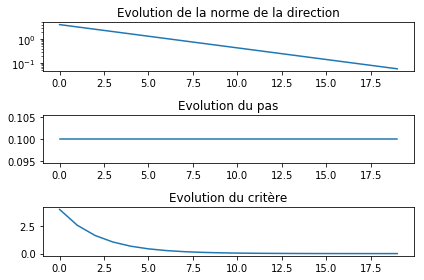

In [9]:
# oracle test : la fonction carré en 1 dimension
oracle_test = lambda x: (x**2, np.array(x*2), None)
print("Descente de gradient à pas fixe :")
result_pas_fixe = gradient(oracle_test, np.array([2]), iter_max=20, default_gradient_step=0.1, threshold=1e-16, use_wolfe=False, verbose=True)

On constate une convergence lente pour un problème simple. Une solution est alors d'augmenter le pas du gradient, mais ce n'est pas suffisant pour un problème plus complexe. On utilise alors l'algorithme de Wolfe pour trouver le pas optimal.

In [10]:
print("Descente de gradient à pas optimal :")
result_pas_opti = gradient(oracle_test, np.array([2]), iter_max=50, threshold=1e-16, verbose=True, visual=False)

Descente de gradient à pas optimal :
Iter : 0 ; gradient_step=0.5 ; gradient_norm=4.0
Iteration : 1
Temps CPU : 0.046875
Critere optimal : [0.]
Norme du gradient : 0.0
X optimal : [0.]


Comme on pouvait s'y attendre, sur un problème convexe à une dimension la solution optimale est trouvée immédiatement.

### Utilisation sur le problème

On peut utiliser ces algorithmes sur notre problème :

PAS FIXE :
Iteration : 4999
Temps CPU : 0.625
Critere optimal : -3.733961223107963
Norme du gradient : 0.028700389869872823
X optimal : [ 0.31434803 -0.01830624  0.16351537  0.43068962  0.03819492 -0.01461305
 -0.15146683 -0.11869793  0.18298969]


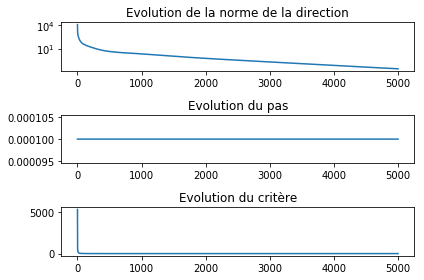

In [11]:
print("PAS FIXE :")
result = gradient(oracle, x0, default_gradient_step=0.0001, use_wolfe=False)

PAS OPTIMAL :
Iteration : 310
Temps CPU : 0.578125
Critere optimal : -3.7340070480435195
Norme du gradient : 8.25115880891858e-07
X optimal : [ 0.3116708  -0.01749637  0.16279675  0.4306519   0.03817885 -0.01562977
 -0.15147633 -0.11908204  0.18404951]


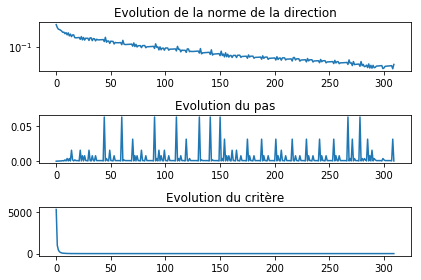

In [12]:
print("PAS OPTIMAL :")
result = gradient(oracle, x0)

## Gradient conjugué

On implémente la méthode de gradient conjugué non linéaire avec l'algorithme de Polak-Ribière.

In [13]:
from src.gradient_conjug_polak import gradient_polak

Iteration : 252
Temps CPU : 0.4375
Critere optimal : -3.7340070480435568
Norme du gradient : 9.657452127076459e-07
X optimal : [ 0.31167071 -0.01749637  0.16279675  0.4306519   0.03817884 -0.01562977
 -0.15147633 -0.11908204  0.18404951]


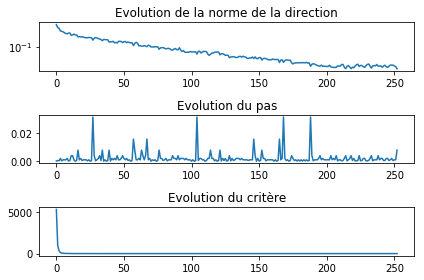

In [14]:
result_polak = gradient_polak(oracle, x0)

## Méthode de Newton

On implémente la méthode de Newton.

In [15]:
from src.newton import newton

Iteration : 8
Temps CPU : 0.0
Critere optimal : -3.734007048043562
Norme de la direction : 2.1725179988885503e-10
X optimal : [ 0.31167069 -0.01749637  0.16279675  0.4306519   0.03817885 -0.01562978
 -0.15147633 -0.11908204  0.18404951]


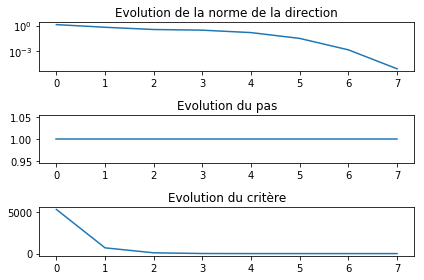

In [16]:
result_newton = newton(oracle, x0)

## Méthode quasi-Newton (BFGS)

On implémente la méthode dite "quasi-Newton" BFGS, qui utilise une approximation de l'inverse du hessien.

In [17]:
from src.bfgs import bfgs

Iteration : 36
Temps CPU : 0.03125
Critere optimal : -3.734007048043562
Norme du gradient : 8.10958666457189e-07
X optimal : [ 0.3116707  -0.01749637  0.16279675  0.4306519   0.03817885 -0.01562977
 -0.15147633 -0.11908204  0.18404951]


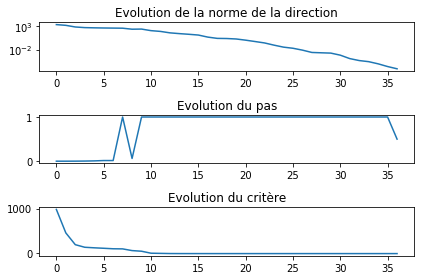

In [18]:
result_bfgs = bfgs(oracle, x0)

# Problème dual

## Résultats théoriques

*TODO*

- Ecrire le lagrangien associé au problème sous contraintes (14) et ses conditions d’optimalité ;
- Vérifier que ces conditions correspondent aux équations (6) et (8) de l’équilibre du réseau.

- Constater que la minimisation en $q$ du lagrangien se fait de manière explicite ;
- Donner l’expression de l’argmin $q^♯$ en fonction du multiplicateur dual $\lambda$ et calculer les expressions de la fonction duale $\Phi$, de son gradient et de son hessien en fonction de $\lambda$.

## Oracle

On implémente l'oracle avec le Lagrangien :

In [19]:
from src.oracle_lagrange import oracle as oracle_dual

In [20]:
u0 = np.random.normal(size=datas_r.md)

## Résolution

On résoud le problème dual grâce aux algorithmes précédents :

PAS FIXE :
Iteration : 9999
Temps CPU : 1.546875
Critere optimal : 3.735835404666469
Norme du gradient : 0.0033090502637815474
X optimal : [105.40995947 123.59722768 104.00180079  87.20562205 102.73111243
 105.03612433 103.10632743  85.72808902  73.07698893 102.7593941
  75.93828477  99.23734406 104.02723691]


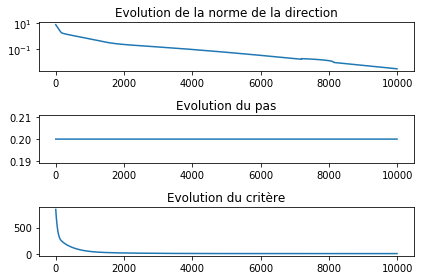

In [28]:
print("PAS FIXE :")
result = gradient(oracle_dual, u0, default_gradient_step=0.2, use_wolfe=False, iter_max=10000)

PAS OPTIMAL :
Iteration : 1549
Temps CPU : 0.96875
Critere optimal : 3.750298803912206
Norme du gradient : 0.009860107237050723
X optimal : [105.39473439 123.57076099 104.00031567  86.33682012 102.66103927
 104.98014827 103.05843446  84.81753592  71.68331661 102.69598969
  74.85123914  98.92937207 104.02435078]


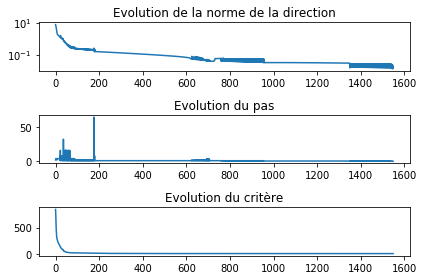

In [35]:
print("PAS OPTIMAL :")
result = gradient(oracle_dual, u0, threshold=0.01, iter_max=5000)

Iteration : 1736
Temps CPU : 0.984375
Critere optimal : 3.7340070481706387
Norme du gradient : 9.982682971656135e-07
X optimal : [105.41805106 123.61132965 104.00306107  87.59874828 102.76776558
 105.06521993 103.13094074  86.14112114  73.86749631 102.79219617
  76.43419698  99.37931831 104.0286136 ]


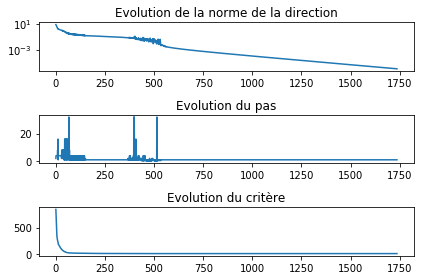

In [23]:
result_polak = gradient_polak(oracle_dual, u0)

Iteration : 27
Temps CPU : 0.0625
Critere optimal : 3.7340070480435656
Norme de la direction : 6.88217741095439e-07
X optimal : [105.41805316 123.61133266 104.00306123  87.59879776 102.76777514
 105.06522706 103.13094635  86.14117357  73.86777611 102.79220412
  76.43426036  99.37933844 104.02861378]


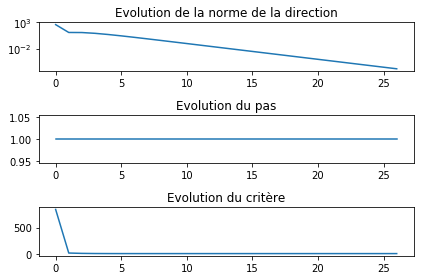

In [24]:
result_newton = newton(oracle_dual, u0)

Iteration : 76
Temps CPU : 0.09375
Critere optimal : 3.7340070480438476
Norme du gradient : 8.77770402633094e-07
X optimal : [105.41805311 123.61133309 104.00306121  87.59879651 102.76777497
 105.06522703 103.13094639  86.14117263  73.86777501 102.79220408
  76.43426041  99.37933823 104.02861376]


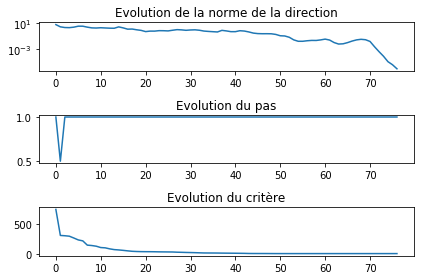

In [25]:
result_bfgs = bfgs(oracle_dual, u0)